In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
base_dir = '/home/jh/git/palletizing/rectpack_dataset_generation/dataset_v1/'


datadir_name_list = os.listdir(base_dir)
np.sort(datadir_name_list)
datadir_name_list = np.sort(datadir_name_list)[1:]

In [19]:
# create empty dictionary
analysis = {}
keynames = ['MaxRectsBl', 'MaxRectsBssf', 'MaxRectsBaf', 'MaxRectsBlsf', 'SkylineBl', 'SkylineBlWm', 'SkylineMwf', 'SkylineMwfl', 'SkylineMwfWm', 'SkylineMwflWm', 'GuillotineBssfSas', 'GuillotineBssfLas', 'GuillotineBssfSlas', 'GuillotineBssfLlas', 'GuillotineBssfMaxas', 'GuillotineBssfMinas', 'GuillotineBlsfSas', 'GuillotineBlsfLas', 'GuillotineBlsfSlas', 'GuillotineBlsfLlas', 'GuillotineBlsfMaxas', 'GuillotineBlsfMinas', 'GuillotineBafSas', 'GuillotineBafLas', 'GuillotineBafSlas', 'GuillotineBafLlas', 'GuillotineBafMaxas', 'GuillotineBafMinas']
for name in keynames:
    analysis[name] = []


# for name in datadir_name_list:
for i in range(len(datadir_name_list)):

# for i in range(20):
    name = datadir_name_list[i]
    data = np.load(base_dir + name, allow_pickle=True)
    packing_logs = data[1]

    for i in range(len(packing_logs)):
        name = packing_logs[i]['algorhithm_name']
        loading_rate = [packing_logs[i]['loading_rate']]
        analysis[name] += loading_rate


In [20]:
analysis_array = []
for key in keynames:
    analysis_array.append(analysis[key])
analysis_array = np.array(analysis_array).T

print(analysis_array.shape)


(1000, 28)


In [21]:
best_a_name_list = []
for array in analysis_array:
    best_a_name = keynames[np.argmax(array)]
    best_a_name_list.append(best_a_name)

/home/jh/anaconda3/envs/jh/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jh/anaconda3/envs/jh/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jh/anaconda3/envs/jh/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jh/anaconda3/envs/jh/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jh/anaconda3/envs/jh/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.c

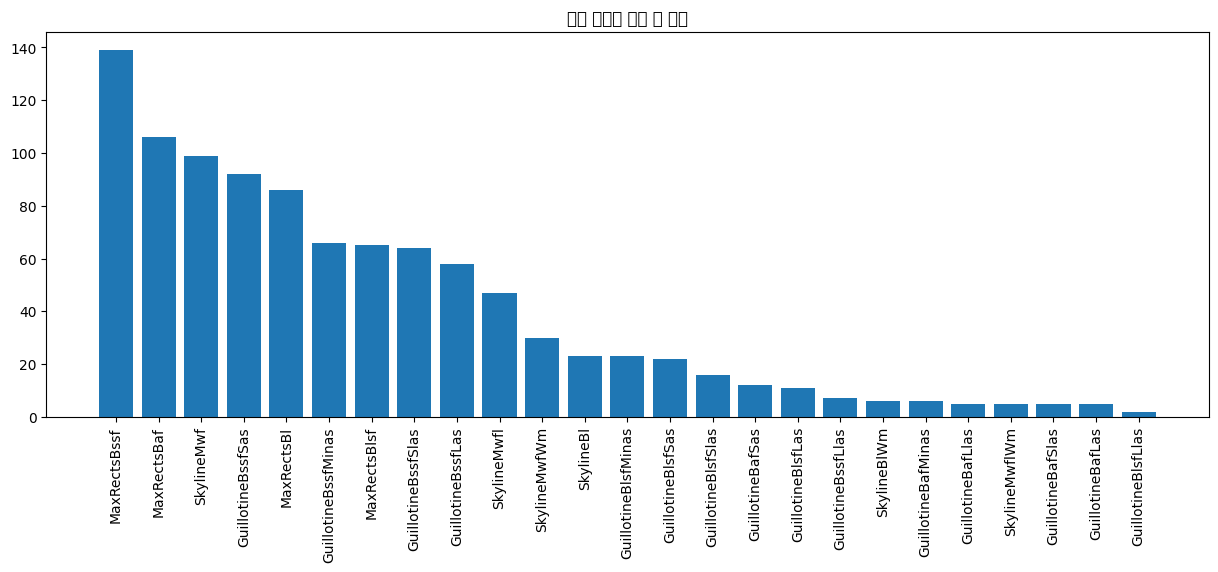

In [22]:
# count

unique, counts = np.unique(best_a_name_list, return_counts=True)

# 큰 순서대로 정렬
sort_idx = np.argsort(counts)[::-1]
unique = unique[sort_idx]
counts = counts[sort_idx]


# plot

plt.figure(figsize=(15, 5))
plt.title('최고 적재율 달성 수 순위')
plt.bar(unique, counts)
plt.xticks(rotation=90)
plt.show()


In [23]:
means = np.mean(analysis_array, axis=0)
stds = np.std(analysis_array, axis=0)
print(means.shape)
print(stds.shape)

(28,)
(28,)


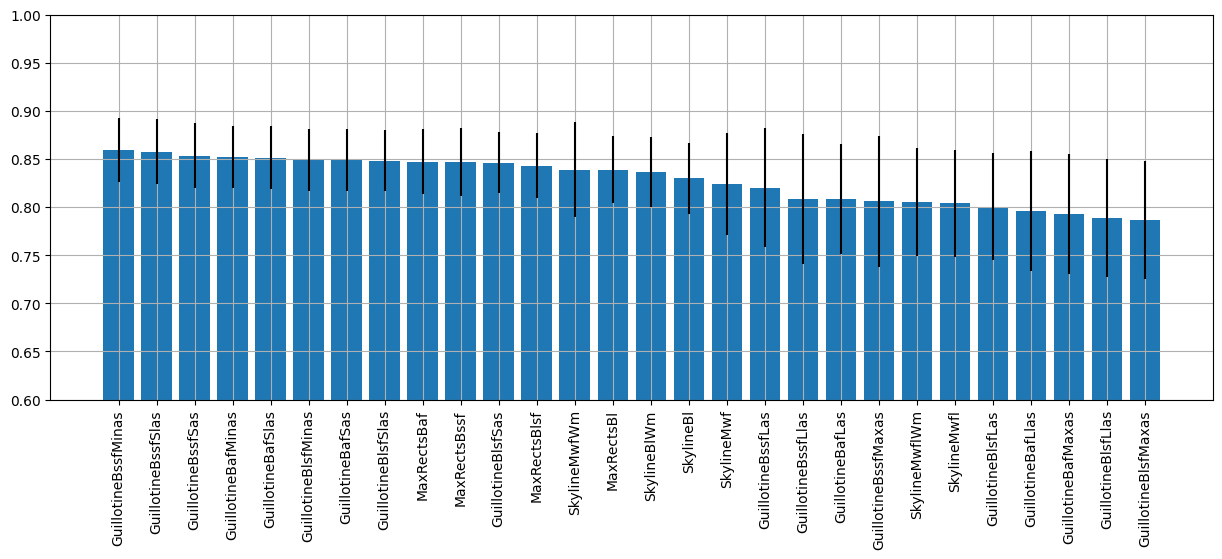

In [30]:
# means가 큰 순서대로 keys를 정렬
sort_idx = np.argsort(means)[::-1]
keynames = np.array(keynames)
plt.figure(figsize=(15, 5))
# plt.title('적재율 순위')
plt.bar(keynames[sort_idx], means[sort_idx], yerr=stds[sort_idx])
plt.xticks(rotation=90)
plt.ylim(0.6, 1)
plt.grid()

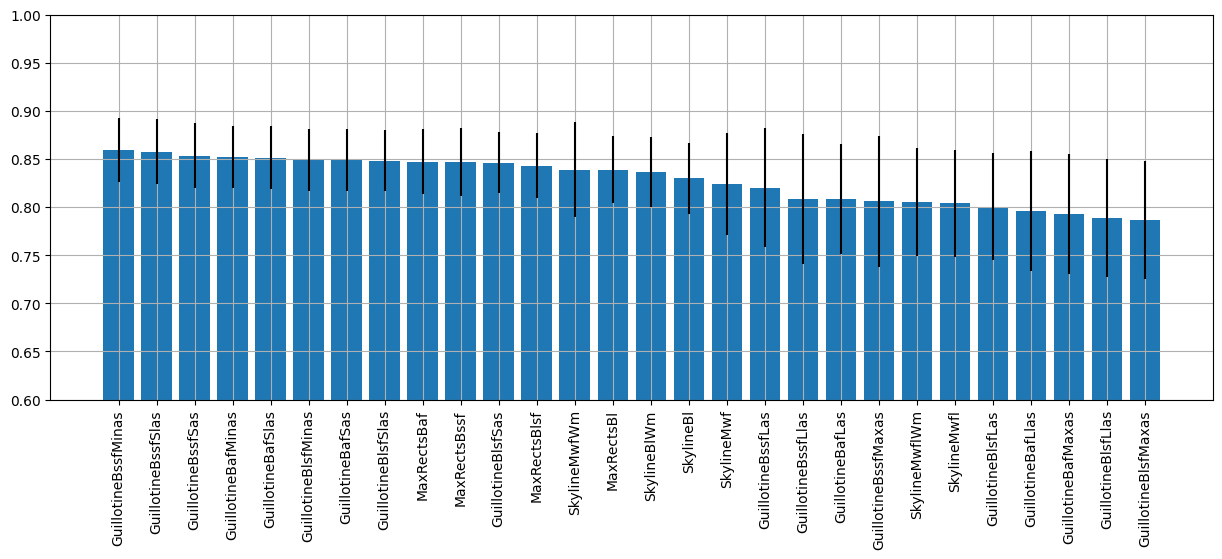

In [25]:
plt.figure(figsize=(15, 5))
# plt.title('적재율 순위')
plt.bar(keynames[sort_idx], means[sort_idx], yerr=stds[sort_idx])
plt.xticks(rotation=90)
plt.ylim(0.6, 1)
plt.grid()

In [31]:
for i in range(len(keynames)):
    print(i,keynames[sort_idx][i], ':', means[sort_idx][i], '±', np.sqrt(stds[sort_idx][i]))

0 GuillotineBssfMinas : 0.8590160000000001 ± 0.18288189965290894
1 GuillotineBssfSlas : 0.857466311111111 ± 0.1835592974319084
2 GuillotineBssfSas : 0.853248888888889 ± 0.18354106826446553
3 GuillotineBafMinas : 0.8520693333333332 ± 0.17851743151133107
4 GuillotineBafSlas : 0.8513116444444445 ± 0.18003209372519366
5 GuillotineBlsfMinas : 0.8489301333333333 ± 0.1788597761117846
6 GuillotineBafSas : 0.8488035555555554 ± 0.18003417353836576
7 GuillotineBlsfSlas : 0.8483290666666666 ± 0.1791725293877591
8 MaxRectsBaf : 0.8470677333333333 ± 0.18299499277192494
9 MaxRectsBssf : 0.846688 ± 0.1871612567815771
10 GuillotineBlsfSas : 0.8462408888888889 ± 0.1783128202290286
11 MaxRectsBlsf : 0.8430711111111111 ± 0.18302831246363319
12 SkylineMwfWm : 0.8388757333333333 ± 0.2227440382343441
13 MaxRectsBl : 0.8387912888888889 ± 0.18668286790888322
14 SkylineBlWm : 0.8365528888888889 ± 0.1902862058302128
15 SkylineBl : 0.8300138666666667 ± 0.19188375499833288
16 SkylineMwf : 0.8237226666666666 ± 0.22